In [2]:
import pandas as pd
import numpy as np
from copy import deepcopy
import seaborn as sns
import sklearn

In [63]:
### assumption
# protein activation is s.s.d 
def antiEM(S_Ao, S_D, A_D, e=1e-4):
    e = 1e-4
    S_Do = np.zeros((0, S_D.shape[1]))

    kf = KFold(n_splits=10)
    kf.get_n_splits(S_D)
    for train_index, test_index in kf.split(S_D):

        S_Dl, S_Dt = S_D.iloc[train_index, :], S_D.iloc[test_index, :]
        S_Aol, S_Aot = S_Ao.iloc[train_index, :], S_Ao.iloc[test_index, :]

        pD1 = np.sum(S_Dl, 0)[:, None] / (S_Dl.shape[0])     
        pA1D1 = np.dot(S_Dl.T, S_Aol) / np.sum(S_Dl, 0)[:, None]
        pA1D0 = np.dot((1-S_Dl).T, S_Aol) / np.sum(1 - S_Dl, 0)[:, None]
        print(pA1D1.shape)
        logpD1 = np.log(pD1 + e)
        logpD0 = np.log(1 - pD1 + e)
        logpA1D1 = np.log(pA1D1 + e) * A_D.T
        logpA0D1 = np.log(1 - pA1D1 + e) * A_D.T
        logpA1D0 = np.log(pA1D0 + e) * A_D.T
        logpA0D0 = np.log(1 - pA1D0 + e) * A_D.T

        logpD1A = np.dot(S_Aot, logpA1D1.T) + np.dot(1 - S_Aot, logpA0D1.T) + logpD1.T
        logpD0A = np.dot(S_Aot, logpA1D0.T) + np.dot(1 - S_Aot, logpA0D0.T) + logpD0.T
        S_Ddt = 1 / (1 + np.exp(logpD1A - logpD0A))
        S_Do= np.vstack((S_Do, S_Ddt))

    S_Do = pd.DataFrame(S_Do, index=S_D.index, columns=S_D.columns)
    return S_Do

In [3]:
S_Am = pd.read_csv('EM/S_Am.csv', header=0, index_col=0)
S_Dm = pd.read_csv('EM/S_Dm.csv', header=0, index_col=0)

In [4]:
S_D_all = pd.read_csv('EM/PanCancer13tts.DEGmatrix.4TCI.csv', header=0, index_col=0)

In [15]:
A_Dn = pd.read_csv('EM/A_Dn.csv', header=0, index_col=0)
S_A = S_Am.loc[:,A_D.index]
S_D =S_Dm.loc[:,A_D.columns]
#S_Ao = EM(S_A, S_D, A_D)
#S_Ao10 = EM10fold(S_A, S_D, A_D)

In [918]:
S_Aor_l = []
S_Aor10_l = []
for i in range(3):
    A_D = pd.read_csv('EM/A_D_all_rd/A_D_all_rd_%i'%i+'.csv', header=0, index_col=0)
    S_A = S_Am.loc[:,A_D.index]
    S_D =S_D_all.loc[:,A_D.columns]
    S_Aor = EM(S_A, S_D, A_D)
    S_Aor10 = EM10fold(S_A, S_D, A_D)
    S_Aor_l.append(S_Aor)
    S_Aor10_l.append(S_Aor10)
    print(i)

5
46
5
274
4
2
11
66
6
3
3
8
68
965
59
7
162
447
203
61
145
125
94
8
6
4
18
3
285
51
21
8
26
113
66
100
290
6
8
137
82
69
8
262
198
119
354
87
16
32
38
78
167
301
183
6
406
37
36
355
7
90
218
16
49
89
70
16
23
100
252
35
126
51
102
124
444
9
10
37
49
5
64
86
25
127
77
257
4
80
41
3
21
131
52
19
97
56
230
11
7
47
820
1094
399
73
101
69
128
380
196
516
752
30
228
2
163
10
118
40
38
150
52
120
8
242
65
51
18
56
24
53
217
67
13
8
8
155
4
302
328
3
144
8
55
6
10
7
32
161
101
904
49
28
80
188
6
9
12
78
177
8
29
7
198
33
170
14
11
85
114
932
105
172
33
17
6
598
13
85
14
4
4
205
155
39
221
170
12
156
75
116
21
329
34
83
169
172
169
50
125
134
9
370
2
157
79
9
7
23
119
19
616
89
10
21
158
66
345
623
30
450
88
611
90
78
68
353
78
167
181
8
17
92
51
18
746
23
1087
15
101
3
5
112
78
166
55
36
111
16
132
78
112
215
91
395
87
140
2
175
37
2
37
28
14
48
43
457
11
246
9
329
7
19
78
41
51
41
45
153
71
252
52
463
38
60
5
251
96
108
695
10
181
36
138
48
130
53
491
18
50
115
231
15
27
15
81
216
17
172
2
1

KeyboardInterrupt: 

Text(0.5, 0, 'SGA-DEG relationship')

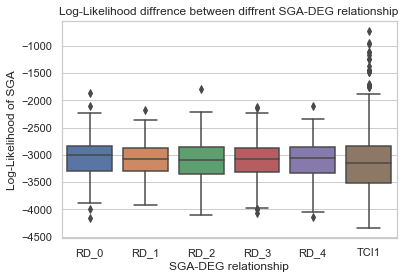

In [757]:
lh_t = [[ele[-1]/5 for ele in ele_l[1]] for ele_l in S_Aor_l] 
lh_df = pd.DataFrame(lh_t, index=['RD'+'_%i'%i for i in range(len(S_Aor_l))], columns=S_A.columns).T
lh_df.loc[:,'TCI1'] = [ele[-1]/5 for ele in S_Aodi[1]]
ax = sns.boxplot(data=lh_df)
ax.set_title('Log-Likelihood diffrence between diffrent SGA-DEG relationship')
ax.set_ylabel('Log-Likelihood of SGA')
ax.set_xlabel('SGA-DEG relationship')

Text(0.5, 0, 'SGA-DEG relationship')

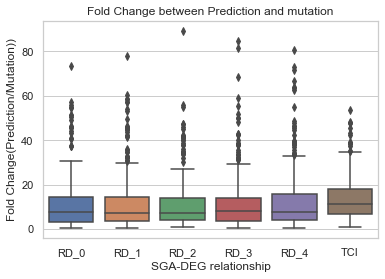

In [801]:
fc_t = [np.sum(ele[0])/np.sum(S_A) for ele in S_Aor_l]
fc_df = pd.DataFrame(fc_t, index=['RD'+'_%i'%i for i in range(len(S_Aor_l))]).T
fc_df.loc[:,'TCI'] = np.sum(S_Ao[0])/np.sum(S_A)
ax = sns.boxplot(data=fc_df)
ax.set_title('Fold Change between Prediction and mutation')
ax.set_ylabel('Fold Change(Prediction/Mutation))')
ax.set_xlabel('SGA-DEG relationship')

Text(0.5, 0, 'SGA-DEG relationship')

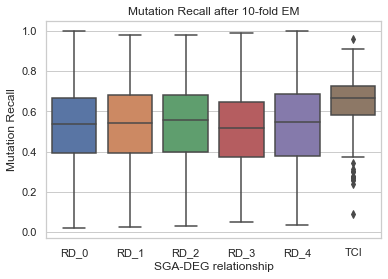

In [830]:
import sklearn
recall_l = [[sklearn.metrics.recall_score(S_A[i], (ele[i]>0.5)) for i in S_A.columns] for ele in S_Aor10_l]
recall_df = pd.DataFrame(recall_l, index=['RD'+'_%i'%i for i in range(len(S_Aor10_l))]).T
recall_df.loc[:,'TCI'] = [sklearn.metrics.recall_score(S_A[i], (S_Ao10[i]>0.5)) for i in S_A.columns] 
ax = sns.boxplot(data=recall_df)
ax.set_title('Mutation Recall after 10-fold EM')
ax.set_ylabel('Mutation Recall')
ax.set_xlabel('SGA-DEG relationship')

In [828]:
edge = pd.read_csv("EM/paper_edge", index_col=None, header=0)
S_Arob = deepcopy(S_A)
node_l = []
for i in edge.index:
    for idx in S_Arob.index:
        if edge.loc[i, "Innode"] in S_Arob.columns:
            node_l.append(edge.loc[i, "Innode"])
            if S_Arob.loc[idx, edge.loc[i, "Innode"]] == 1:
                if edge.loc[i, "Outnode"] in S_Arob.columns:
                    node_l.append(edge.loc[i, "Outnode"])
                    S_Arob.loc[idx, edge.loc[i, "Outnode"]] == 1
node_l = list(set(node_l))

Text(0.5, 0, 'SGA-DEG relationship')

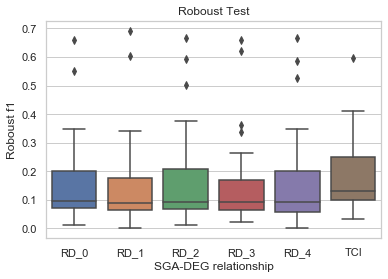

In [837]:
import sklearn
f1_l = [[sklearn.metrics.f1_score(S_Arob[i], (ele[0][i]>0.5),zero_division='warn') for i in node_l] for ele in S_Aor_l]
f1_df = pd.DataFrame(f1_l, index=['RD'+'_%i'%i for i in range(len(S_Aor_l))]).T
f1_df.loc[:,'TCI'] = [sklearn.metrics.f1_score(S_Arob[i], (S_Ao[0][i]>0.5)) for i in node_l] 
ax = sns.boxplot(data=f1_df)
ax.set_title('Roboust Test')
ax.set_ylabel('Roboust f1')
ax.set_xlabel('SGA-DEG relationship')

Text(0.5, 0.98, 'All_Gene Prediction(Random)')

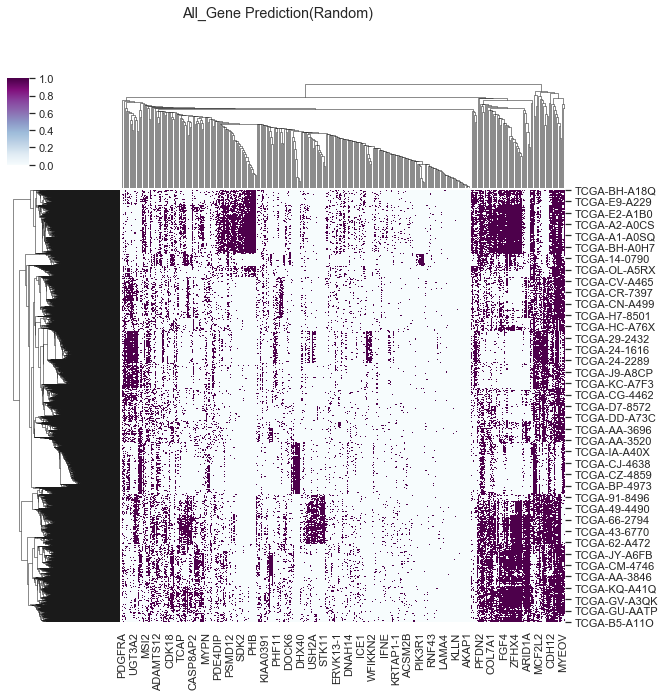

In [878]:
b = 0
for ele in S_Aor_l:
    b = (b + ele[0])/2
a = sns.clustermap(b>0.5, cmap="BuPu")
a.fig.suptitle("All_Gene Prediction(Random)")

In [64]:
## DEG states
from sklearn.model_selection import KFold
S_Dor_l = []
for i in range(3):
    S_Aor = pd.read_csv("EM/S_Aor_%i"%i+".csv", index_col=0, header=0)
    A_Dr = pd.read_csv('EM/A_D_all_rd/A_D_all_rd_%i'%i+'.csv', header=0, index_col=0)
    S_Dor = antiEM(S_Aor, S_D, A_D)
    S_Dor_l.append(pd.DataFrame(S_Dor, index=S_D.index, columns=S_D.columns))

(5259, 372)


ValueError: Unable to coerce to DataFrame, shape must be (17734, 372): given (5259, 372)

Text(0.5, 0, 'SGA-DEG relationship')

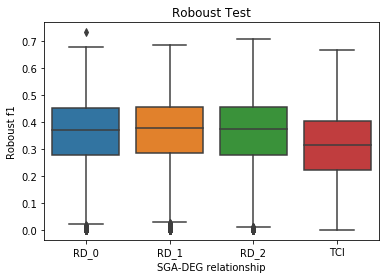

In [56]:
f1_l = [[sklearn.metrics.f1_score(S_D[ele], S_Dor[ele]>0.5) for ele in S_D.columns] for S_Dor in S_Dor_l]
f1_df = pd.DataFrame(f1_l, index=['RD'+'_%i'%i for i in range(len(S_Dor_l))]).T
f1_df.loc[:,'TCI'] = [sklearn.metrics.f1_score(S_D[ele], (S_Do[ele]>0.5)) for ele in S_D.columns] 

ax = sns.boxplot(data=f1_df)
ax.set_title('Roboust Test')
ax.set_ylabel('Roboust f1')
ax.set_xlabel('SGA-DEG relationship')